In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


Using the csv_files/train.csv to plot a scatter plot of parameters 'longest_consec' and 'var_score'.
Shows that a high var_score and a high longest_consec go hand in hand an indicate spammer or scraper.

In [60]:
df = pd.read_csv ('csv_files/train.csv')
df_var_score_longest_cons = df.drop(columns= ['request_freq', 'avg_tokens', 'user'])
longest_cons = df_var_score_longest_cons['longest_consec']
var_score = df_var_score_longest_cons['var_score']


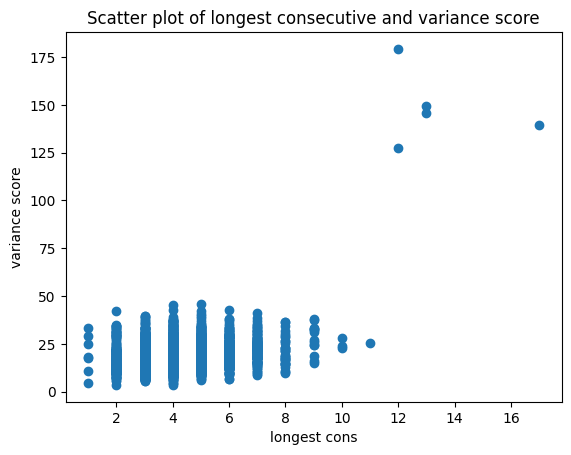

In [61]:
#plt.hist2d(longest_cons, var_score, 100, [[ -180 , 180], [ -180, 180]], False, None, None, None)
plt.scatter(longest_cons, var_score)
plt.title('Scatter plot of longest consecutive and variance score')
plt.xlabel('longest cons')
plt.ylabel('variance score')
plt.show()

Trying out DBSCAN

In [62]:

df_dbscan = pd.read_csv ('csv_files/train.csv')
cons = df_dbscan['longest_consec']
var = df_dbscan['var_score']
cons_var = df_dbscan.drop(columns=['request_freq', 'avg_tokens', 'user'])


In [63]:
X = cons_var.to_numpy()
print(X)
#X = StandardScaler().fit_transform(X)
#print(X)

[[ 12.         127.52380952]
 [ 13.         149.23809524]
 [ 13.         145.6952381 ]
 ...
 [  4.          22.74285714]
 [  3.          18.4       ]
 [  6.          20.80952381]]


In [73]:

# Compute DBSCAN
db = DBSCAN(eps = 0.8 , min_samples = 15).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype = bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_


In [74]:
# Number of clusters in labels, ignoring noise if present
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters)
print('Estimated number of noise: %d' % n_noise)

Estimated number of clusters: 12
Estimated number of noise: 384


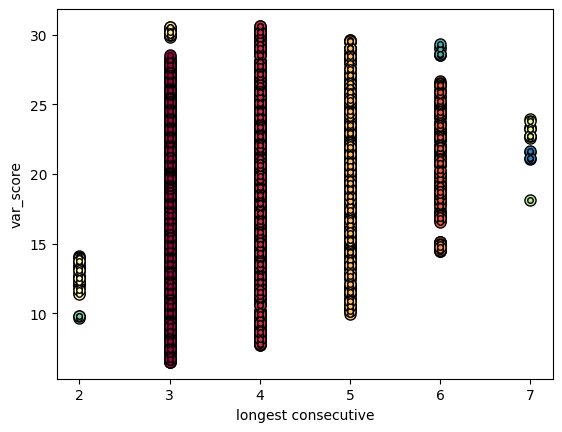

In [75]:
# Plot results
unique_labels =  set(labels)
colors = [plt.cm.Spectral(each)
for each in np.linspace(0,1,len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0,0,0,1]

    class_member_mask = (labels == k)
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[: , 0] , xy[: , 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=8)
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[: , 0], xy[: , 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=4)

plt.xlabel('longest consecutive')
plt.ylabel('var_score')
plt.show()





[-1 -1 -1 ...  1  0  2]
['y', 'b', 'g', 'r']


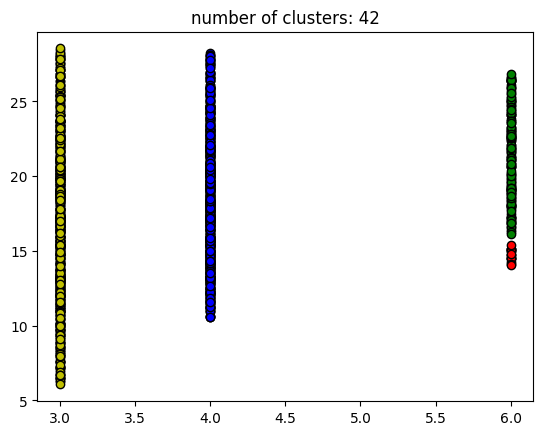

Silhouette Coefficient:-0.46


In [78]:

df_dbscan = pd.read_csv ('csv_files/train.csv')
cons = df_dbscan['longest_consec']
var = df_dbscan['var_score']
cons_var = df_dbscan.drop(columns=['request_freq', 'avg_tokens', 'user'])
X = cons_var.to_numpy()


db = DBSCAN(eps=0.3, min_samples=5).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
  
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  
print(labels)
  
# Plot result
  
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']
print(colors)
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'
  
    class_member_mask = (labels == k)
  
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)
  
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)
  
plt.title('number of clusters: %d' % n_clusters_)
plt.show()
  
#evaluation metrics
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f"%sc)
#ari = adjusted_rand_score(y_true, labels)
#print("Adjusted Rand Index: %0.2f"%ari)